In [17]:
import os

if "notebooks" in os.getcwd():
    %cd ..
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from src.utils.defines import INTERIM_DATA_DIR, AUGMENTED_DATA_DIR
import matplotlib.patches as mpatches

In [18]:
train_df = pd.read_csv(os.path.join(INTERIM_DATA_DIR, "train.csv"))
val_df = pd.read_csv(os.path.join(INTERIM_DATA_DIR, "val.csv"))
train_aug_insertion = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "train_augmented_random_insertion_emb.csv"))
train_aug_synonym = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "train_augmented_synonym_replacement_emb.csv"))
train_rand_swap = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "train_augmented_random_swap.csv"))
train_self_training = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "task_b_GAB_aug.csv"))

C:\Users\jibao\AppData\Local\Temp\ipykernel_22688\4170210820.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=0.8))
C:\Users\jibao\AppData\Local\Temp\ipykernel_22688\4170210820.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))


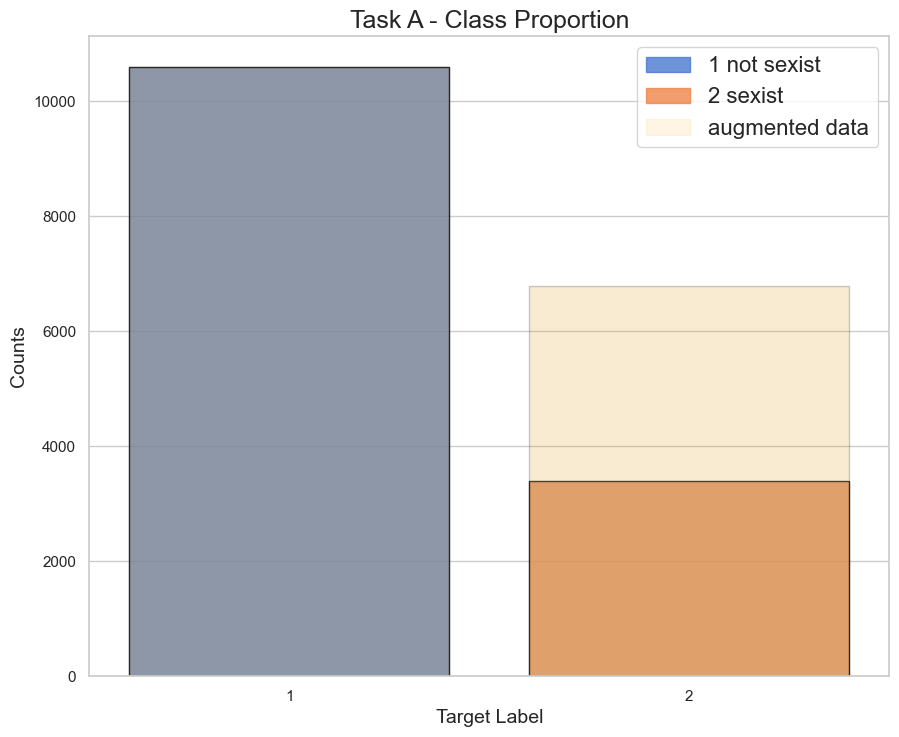

In [19]:
# Explore task a
# train_task_a = train_df.drop(['rewire_id', 'target_b', 'target_c'], axis=1)
train_task_a = train_df.copy()

# augment a
a1_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_a'] == 1]
a1_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_a'] == 1]

orig_len = len(a1_aug_syn)

aug_task_a = pd.concat([train_task_a,
                        a1_aug_insertion.sample(int(orig_len * 1)),
                        a1_aug_syn.sample(int(orig_len * 0))])

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

plt.ylabel("Counts", size=14)
plt.xlabel("Target Label", size=14)
plt.title("Task A - Class Proportion", size=18)

# Count the number of occurrences of each class label
counts = train_task_a['target_a'].value_counts()
counts1 = aug_task_a['target_a'].value_counts()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)

# Create a bar plot using Seaborn
palette = sns.color_palette("muted")
sns.barplot(x=counts.index, y=counts.values, order=counts.index, palette=palette,
            edgecolor="black", alpha=0.8)

sns.barplot(x=counts1.index, y=counts1.values, order=counts1.index, color='orange',
            edgecolor="black", alpha=0.2)

labels = ['1 not sexist', '2 sexist']
labels_axis = ['1', '2']
plt.xticks([0, 1], labels_axis)

# Create proxy artists for the legend
proxy_artists = []
for i, (label, color) in enumerate(zip(labels, palette)):
    proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=0.8))
    if i == 1:
        # Add a separate bar for augmented data
        proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))

# Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# aug_task_a.to_csv(Path(AUGMENTED_DATA_DIR, f"augmented_task_a.csv"), index=False)
# plt.savefig('TaskA-ClassProportion.png', dpi=500)

threats, plans to harm and incitement: 310
derogation: 1590
animosity: 1165
prejudiced discussions: 333
total sexist task b: 3398
augmented dataset b count: 3925, aug ratio: 1.1550912301353737


C:\Users\jibao\AppData\Local\Temp\ipykernel_22688\59927325.py:90: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=1))
C:\Users\jibao\AppData\Local\Temp\ipykernel_22688\59927325.py:93: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))


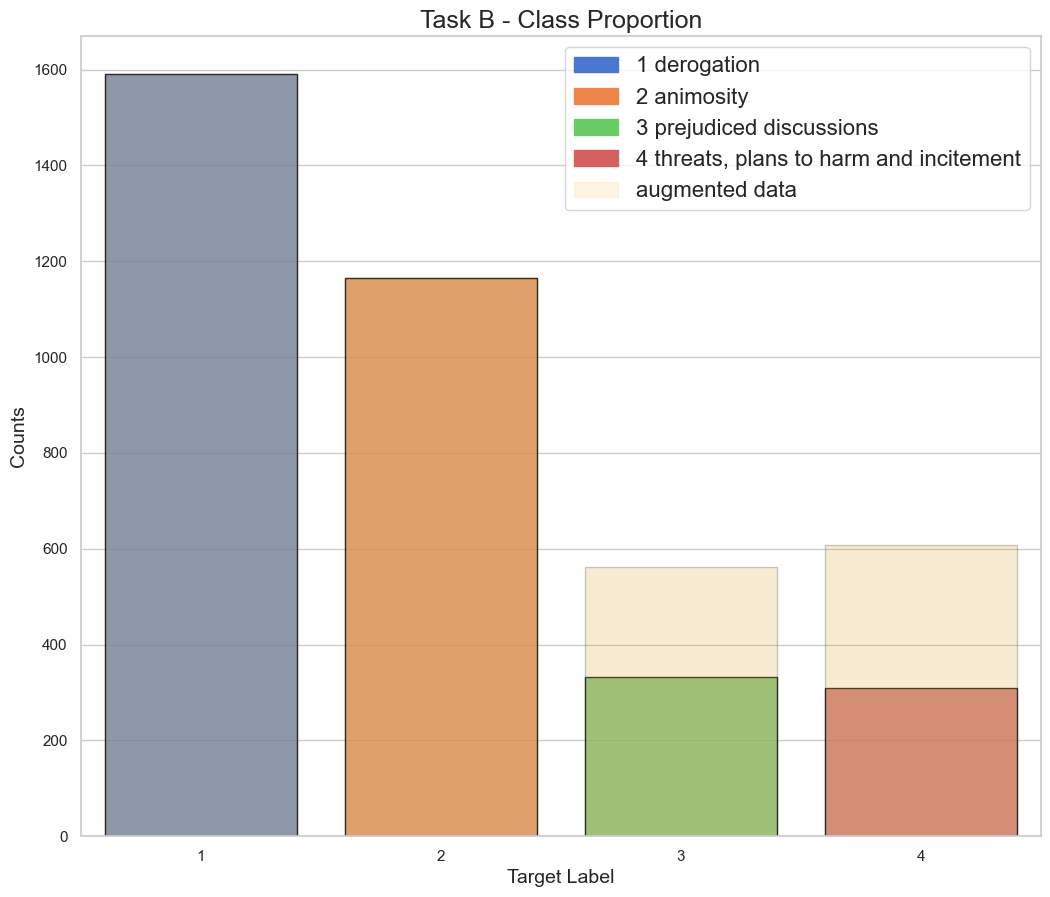

In [43]:
# Explore task b
# train_task_b = train_df.drop(['rewire_id', 'target_a', 'target_c'], axis=1)
train_task_b = train_df.copy()
train_task_b = train_task_b.loc[train_task_b['target_b'] != -1]

b1 = train_task_b.loc[train_task_b['target_b'] == 0]
b1_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 0]
b1_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 0]
b1_aug_swap = train_rand_swap.loc[train_rand_swap['target_b'] == 0]
b1_sf = train_self_training.loc[train_self_training['target_b'] == 0]
print(f"threats, plans to harm and incitement: {len(b1)}")

b2 = train_task_b.loc[train_task_b['target_b'] == 1]
b2_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 1]
b2_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 1]
b2_sf = train_self_training.loc[train_self_training['target_b'] == 1]
print(f"derogation: {len(b2)}")

b3 = train_task_b.loc[train_task_b['target_b'] == 2]
b3_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 2]
b3_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 2]
b3_sf = train_self_training.loc[train_self_training['target_b'] == 2]
print(f"animosity: {len(b3)}")

b4 = train_task_b.loc[train_task_b['target_b'] == 3]
b4_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 3]
b4_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 3]
b4_aug_swap = train_rand_swap.loc[train_rand_swap['target_b'] == 3]
b4_sf = train_self_training.loc[train_self_training['target_b'] == 3]
print(f"prejudiced discussions: {len(b4)}")

print(f"total sexist task b: {len(pd.concat([b1, b2, b3, b4]))}")

aug_task_b = pd.concat([train_task_b,
                        b1_aug_insertion.sample(int(len(b1) * 0)),
                        b1_aug_syn.sample(int(len(b1) * 0)),
                        b1_aug_swap.sample(int(len(b1) * 0)),

                        b2_aug_insertion.sample(int(len(b2) * 0)),
                        b2_aug_syn.sample(int(len(b2) * 0)),

                        b3_aug_insertion.sample(int(len(b3) * 0)),
                        b3_aug_syn.sample(int(len(b3) * 0)),

                        b4_aug_syn.sample(int(len(b4) * 0)),
                        b4_aug_insertion.sample(int(len(b4) * 0)),
                        b4_aug_swap.sample(int(len(b4) * 0)),

                        b1_sf.sample(int(len(b1_sf) * 1)),
                        b2_sf.sample(int(len(b2_sf) * 0)),
                        b3_sf.sample(int(len(b3_sf) * 0)),
                        b4_sf.sample(int(len(b4_sf) * 1))])

print(f"augmented dataset b count: {len(aug_task_b)}, aug ratio: {len(aug_task_b)/len(train_task_b)}")

# aug_task_b.to_csv(Path(AUGMENTED_DATA_DIR, f"augmented_task_b.csv"), index=False)


plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

plt.ylabel("Counts", size=14)
plt.xlabel("Target Label", size=14)
plt.title("Task B - Class Proportion", size=18)

# Count the number of occurrences of each class label
counts = train_task_b['target_b'].value_counts()
counts1 = aug_task_b['target_b'].value_counts()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)
counts1 = counts1.reindex([1,2,3,0])


# Create a bar plot using Seaborn
palette = sns.color_palette("muted")
sns.barplot(x=counts.index, y=counts.values, order=counts.index, palette=palette,
            edgecolor="black", alpha=0.8)

sns.barplot(x=counts1.index, y=counts1.values, order=counts1.index, color='orange',
            edgecolor="black", alpha=0.2)

labels = ['1 derogation', '2 animosity', '3 prejudiced discussions', '4 threats, plans to harm and incitement']
labels_axis = ['1', '2', '3', '4']
plt.xticks([0, 1, 2, 3], labels_axis)

# Create proxy artists for the legend
proxy_artists = []
for i, (label, color) in enumerate(zip(labels, palette)):
    proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=1))
    if i == 3:
        # Add a separate bar for augmented data
        proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))

# Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=16, bbox_to_anchor=(1.0, 1.0))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
# plt.savefig('TaskB-ClassProportion_aug.png', dpi=500)

In [22]:
aug_task_b

,rewire_id,text,target_a,target_b,target_c
4,sexism2022_english-7228,[USER] Leg day is easy. Hot girls who wear min...,1.000000,2,7.000000
6,sexism2022_english-872,I get a new pussy every other week or whenever...,1.000000,1,4.000000
11,sexism2022_english-14992,O come on there's no way any men are attracted...,1.000000,1,4.000000
21,sexism2022_english-7260,Former BBC journalist Thuto Mali says that uni...,1.000000,3,10.000000
25,sexism2022_english-7022,I did. You have to have the bravery to escalat...,1.000000,0,1.000000
...,...,...,...,...,...
663,0.728451,RT RT_com ‘End of equal rights’: Police union ...,0.728451,3,0.728451
971,0.406775,Or you could replace boys with girls... #ManHa...,0.406775,3,0.406775
1620,0.802758,“Toxic Masculinity” : The Emasculation of Men ...,0.802758,3,0.802758
802,0.005581,"Special episode of Loomy Does Politics, by pop...",0.005581,3,0.005581


In [30]:
from src.data.text_processing import TextPreprocessor
text_preprocessor = TextPreprocessor(preprocessing_mode='none')

aug_task_b["text"] = text_preprocessor.transform_series(
    aug_task_b["text"]
)
aug_task_b = aug_task_b[aug_task_b['target_b'] != -1]
aug_task_b = aug_task_b.to_numpy()

In [32]:
aug_task_b[:, 1]

array(['[USER] Leg day is easy. Hot girls who wear miniskirts get asked out.',
       "I get a new pussy every other week or whenever i want really. Didnt have to learn how to either from YouTube videos. Also PUAs dont get laid. At best they get 5/10 asian ladies after spending years pretending to be something they aren't. Its pathetic",
       "O come on there's no way any men are attracted to her shes a pig🙄",
       ...,
       'With a rapist she is guaranteed to have a man finally touch her. A racist would just walk away.',
       "Woman in position of power >Somehow she's still the victim This is #gynocentrism.",
       'She could easily seduce students and still keep her teaching certificate'],
      dtype=object)

In [ ]:
# Explore task c
train_task_c = train_df.drop(['rewire_id', 'target_a', 'target_b'], axis=1)
train_task_c = train_task_c.loc[train_task_c['target_c'] != -1]

b1 = train_task_b.loc[train_task_b['target_b'] == 0]
b1_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 0]
b1_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 0]
print(f"1.1: {len(b1)}")

b2 = train_task_b.loc[train_task_b['target_b'] == 1]
b2_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 1]
b2_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 1]
print(f"derogation: {len(b2)}")

b3 = train_task_b.loc[train_task_b['target_b'] == 2]
b3_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 2]
b3_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 2]
print(f"animosity: {len(b3)}")

b4 = train_task_b.loc[train_task_b['target_b'] == 3]
b4_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 3]
b4_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 3]
print(f"prejudiced discussions: {len(b4)}")

print(f"total sexist task b: {len(pd.concat([b1, b2, b3, b4]))}")

aug_task_b = pd.concat([train_task_b,
                        b1_aug_insertion, b1_aug_syn,
                        b2_aug_insertion.sample(int(len(b2)*0.5)),
                        b3_aug_insertion.sample(int(len(b3)*0.5)),
                        b4_aug_syn, b4_aug_insertion])

print(f"augmented dataset b count: {len(aug_task_b)}, aug ratio: {len(train_task_b)/len(aug_task_b)*100}")

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

plt.ylabel("Counts", size=14)
plt.xlabel("Target Label", size=14)
plt.title("Task C - Class Proportion", size=18)

# Count the number of occurrences of each class label
counts = train_task_c['target_c'].value_counts()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)

# Create a bar plot using Seaborn
palette = sns.color_palette("muted")
sns.barplot(x=counts.index, y=counts.values, order=counts.index, palette=palette,
            edgecolor="black", alpha=0.8)

labels = ["1.1 threats of harm",
          "1.2 incitement and encouragement of harm",
          "2.1 descriptive attacks",
          "2.2 aggressive and emotive attacks",
          "2.3 dehumanising attacks & overt sexual objectification",
          "3.1 casual use of gendered slurs, profanities, and insults",
          "3.2 immutable gender differences and gender stereotypes",
          "3.3 backhanded gendered compliments",
          "3.4 condescending explanations or unwelcome advice",
          "4.1 supporting mistreatment of individual women",
          "4.2 supporting systemic discrimination against women as a group"]

labels_axis = [
    "1.1",
    "1.2 ",
    "2.1 ",
    "2.2 ",
    "2.3 ",
    "3.1 ",
    "3.2 ",
    "3.3 ",
    "3.4",
    "4.1 ",
    "4.2 "
]

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels_axis)

# Create proxy artists for the legend
proxy_artists = []
for label, color in zip(labels, palette):
    print(label)
    proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=0.8))

# Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=12)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
# plt.savefig('TaskC-ClassProportion.png', dpi=500)